# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('./emp_automovel.csv')

In [3]:
dados #Base de dados ja esta tratada

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
x = dados.drop('inadimplente', axis= 1) #Estou coletando as variaveis explicativas, que irão auxiliar na resposta para a variavel alvo(são todas as colunas menos a inadimplente) o axis seria para falar que a coluna daa base de dados esta sendo alterada
y = dados['inadimplente'] #Variavel alvo

In [5]:
from sklearn.tree import DecisionTreeClassifier #Atraves da biblioteca scikit-learn é possível utilizar algoitmos de Machinelearning cmomo a arvore de decisão

In [6]:
modelo = DecisionTreeClassifier() #Criando o modelo
modelo.fit(x,y) #O modelo ira entender os padrões dos dados passados e ira aprender dados novos
modelo.score(x,y) #Estou testando para verificar a taxa de acerto do modelo

1.0

In [7]:
print(f'Acurácia: {modelo.score(x,y)}') #taxa de acerto

Acurácia: 1.0


In [8]:
from sklearn.model_selection import train_test_split #irei usar essa biblioteca para poder separar os dados, em treino, validação e teste com o intuito de poder realizar uma validação do modelo mais acertiva, 

In [9]:
x, x_teste, y, y_teste = train_test_split(x,y, test_size = 0.15, stratify= y, random_state=5  ) #O test_size indica que 15% dos dados serão usados para teste, e os 85% restantes para treinamento, o stratify garante que a divisão dos dados respeite a proporção das classes de y no conjunto original, mantém o balanceamento das classes nos conjuntos de treino e teste, e o x,y seriam a base dos dados que estão divididos
x_treino, x_val, y_treino, y_val = train_test_split(x,y, stratify= y, random_state=5) #O valor de x e y não são mais os mesmos de antes poi por contya do codigo anterior, só a parte de treino e validação esta sendo separada

In [10]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}') #Esse seria o teste com os dados novos, pois o modelo não viu esses dados durante o treinamento

Acurácia de treino: 1.0
Acurácia de validação: 0.8509711697587318


In [11]:
modelo = DecisionTreeClassifier(max_depth=10) #Estou definindo a profundiade da arvore, para evitar que a mesma não apenas memorize os dados de treinamento, com isso o modelo esta aprendendo melhor o padrão dos dados, inves de decorar
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}') 

Acurácia de treino: 0.9205865272938444
Acurácia de validação: 0.9057573382109573


In [12]:
from sklearn.metrics import confusion_matrix #A matriz ira comparar o resultado de classificação do modelo com o resultado real

In [14]:
y_previsto = modelo.predict(x_val) #O modelo esta fazendo uma previsão(Esta entendendo os padrões dods dados e dando uma resposta) com base em dados que não foram visto durante o treinamento
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10359   120]
 [  962    40]]


In [19]:
from sklearn.metrics import ConfusionMatrixDisplay #Ira melhorar o entendimento da matriz

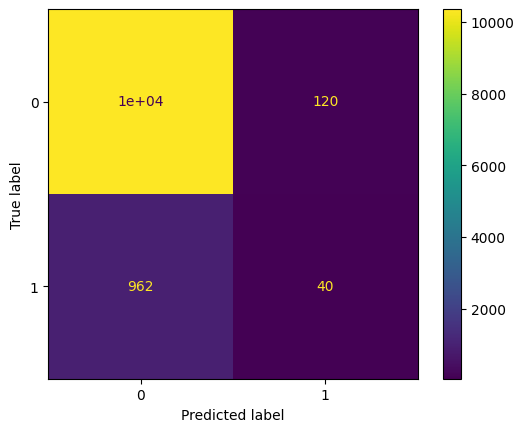

In [20]:
vizualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao)
vizualizacao.plot(); #O ponto e virgula faz com que não mostre as informações textual que aparecem acima dos dados

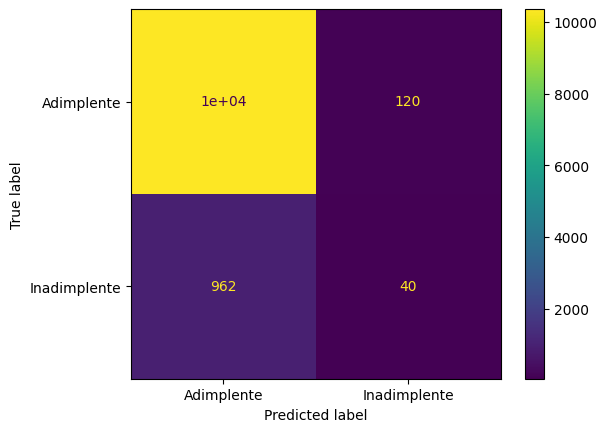

In [21]:
vizualizacao = ConfusionMatrixDisplay(confusion_matrix= matriz_confusao, display_labels=['Adimplente', 'Inadimplente']) #Estou trocando os valores de 0 e 1 que aparecem no grtafico acima
vizualizacao.plot();
#1e+04 seria 10 elevado a 4, no caso seria 10000

In [22]:
from sklearn.metrics import accuracy_score #ira mostrar a taxa de acerto da matriz_confusao

In [23]:
print(f'Acuracia : {accuracy_score(y_val, y_previsto)} ')

Acuracia : 0.9057573382109573 
